<a href="https://colab.research.google.com/github/Santiago-Valencia/LEARNING_ML/blob/master/3_CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVOLUTIONAL NEURAL NETWORK WITH CIFAR-10**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
# from tensorflow import set_random_seed

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
import random as rn
os.environ['PYTHONHASHSEED'] = '0'

os.environ['CUDA_VISIBLE_DEVICES'] = ''
np.random.seed(37)
rn.seed(1254)
tf.random.set_seed(89)

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 4s 0us/step


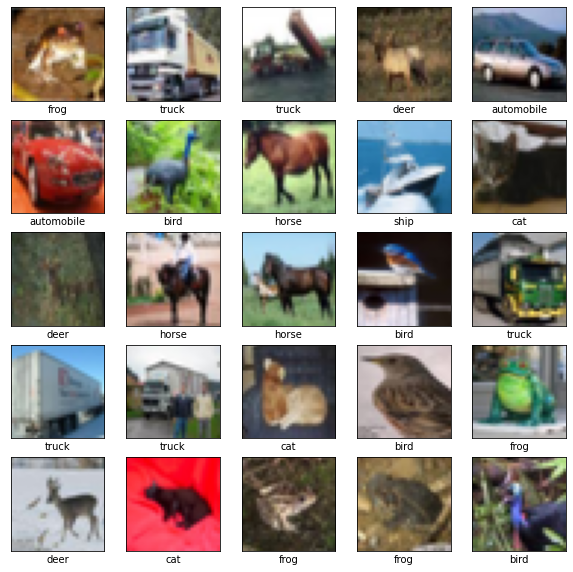

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.4703 - accuracy: 0.4660 - val_loss: 1.1894 - val_accuracy: 0.5775
Epoch 2/10
1563/1563 [==============================] - 60s 38ms/step - loss: 1.0893 - accuracy: 0.6173 - val_loss: 0.9949 - val_accuracy: 0.6557
Epoch 3/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.9409 - accuracy: 0.6695 - val_loss: 0.9192 - val_accuracy: 0.6791
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8462 - accuracy: 0.7037 - val_loss: 0.8994 - val_accuracy: 0.6909
Epoch 5/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7808 - accuracy: 0.7280 - val_loss: 0.8586 - val_accuracy: 0.7088
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7257 - accuracy: 0.7452 - val_loss: 0.8837 - val_accuracy: 0.6999
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6732 - accuracy: 0.7631 - val_loss: 0.8841 -

In [ ]:
predictions = model.predict(test_images)

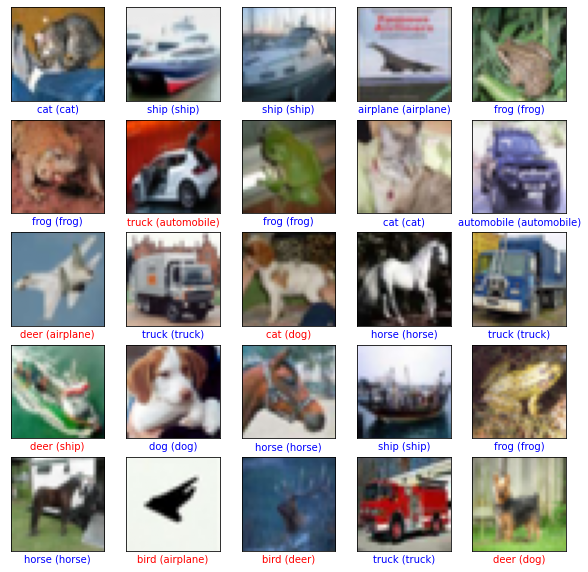

In [ ]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i,:,:,:], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  true_label = true_label[0]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

313/313 - 3s - loss: 0.8560 - accuracy: 0.7150


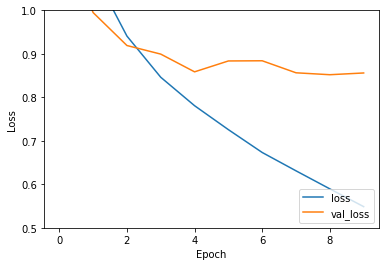

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

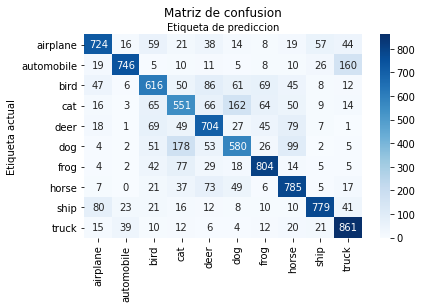

In [ ]:
from sklearn import metrics
import seaborn as sns
import pandas as pd



y_pred = np.argmax(model.predict(test_images), axis=-1)
# y_pred =  model.predict_classes(test_images)
y_ref = test_labels

cnf_matrix = metrics.confusion_matrix(y_ref, y_pred)


fig, ax = plt.subplots()
# trick_marks = np.arange(len(class_names))
# plt.xticks(trick_marks, class_names)
# plt.yticks(trick_marks, class_names)

df_cm = pd.DataFrame(cnf_matrix, index = [i for i in class_names],
                  columns = [i for i in class_names])

sns.heatmap(df_cm, annot=True, cmap='Blues' , fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusion', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')

plt.show()